In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# **Pre Processing**

In [0]:
train_data = pd.read_csv("train.csv")[:-2] #reading the csv files using pandas
test_data = pd.read_csv("test.csv")[:-2]

In [0]:
train_data.shape

(41998, 785)

In [0]:
test_data.shape

(27998, 784)

In [0]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41994,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,252,20,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train_data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [0]:
test_data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,...,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.0,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.000000,27998.00000,27998.000000,27998.000000,27998.000000,27998.0,27998.0,27998.0,27998.0,27998.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001357,0.012501,0.016787,0.031717,0.056004,0.100471,0.166940,...,3.272769,2.371634,1.454461,0.846346,0.509786,0.254768,0.062112,0.015251,0.000786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005429,0.024180,0.036253,0.083149,0.134117,0.201086,0.325023,0.366740,0.468176,0.589471,0.657011,0.569755,0.464247,0.323702,0.164619,0.07322,0.028038,0.011251,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227102,1.566331,1.513569,2.674545,3.216349,4.549641,5.470719,...,25.212591,21.240752,16.644058,12.638403,9.964234,7.031755,3.040622,1.265607,0.131480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640491,2.235042,2.494071,3.777845,4.947116,6.263042,7.715089,8.243829,8.974358,10.489068,11.209907,10.204536,9.402532,7.879135,5.473489,3.61694,1.813667,1.205254,0.807504,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0

In [0]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,41998.000000,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.000000,41998.000000,41998.000000,41998.000000,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.000000,41998.00000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,...,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.0,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.00000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.000000,41998.0,41998.0,41998.0,41998.0
mean,4.456498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003000,0.011191,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.00131,0.010548,0.027263,0.050907,0.066408,0.129578,...,3.772703,2.749036,1.796538,1.089957,0.563217,0.239583,0.093528,0.024835,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035835,0.082361,0.114910,0.178723,0.301467,0.413663,0.513691,0.558860,0.677889,0.602838,0.489261,0.34023,0.219296,0.117101,0.059027,0.020191,0.017239,0.002857,0.0,0.0,0.0,0.0
std,2.887704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.568134,1.626965,1.053997,0.043917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078074,0.23264,1.131688,2.310451,3.121921,3.259205,4.993013,...,26.958459,22.879785,18.595547,14.434780,10.518072,6.469468,3.976401,1.846060,0.139559,0.287897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949826,2.350915,3.934374,4.543691,5.856912,7.219914,8.928499,10.004306,10.129836,11.255198,10.696284,9.480291,7.95044,6.313040,4.633929,3.274566,1.759912,1.894543,0.414274,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0

In [0]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


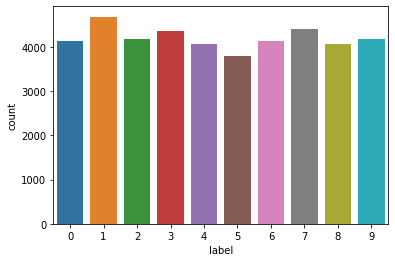

In [0]:
sns.countplot(train_data["label"])

In [0]:

train_data.label.astype('category').value_counts()

1    4684
7    4401
3    4351
9    4187
2    4177
6    4136
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

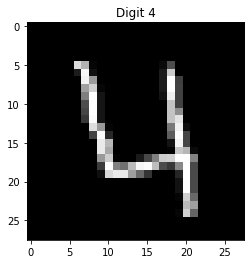

In [0]:
four = train_data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray' ,vmin=0, vmax=255)
plt.title("Digit 4")
plt.show()

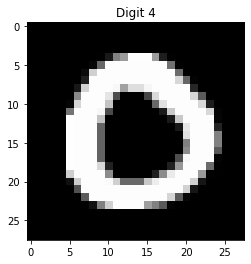

In [0]:
four = train_data.iloc[4, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray' ,vmin=0, vmax=255)
plt.title("Digit 4")
plt.show()

In [0]:
# average feature values
round(train_data.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [0]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)
print(X)
print(y)

(41998, 785)
       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41993       0       0       0       0  ...         0         0         0         0
41994       0       0       0       0  ...         0         0         0         0
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0  

In [0]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (41998, 784)
test_data: (27998, 784)


In [0]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

# **SVM Algorithm(93.1)**

In [0]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [0]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9194444444444444 

[[1196    0    2    2    6    4    3    1    7    0]
 [   0 1344    5    2    5    1    1    2   12    0]
 [   5    8 1151   29   15    6   13    7   10    4]
 [   5    3   27 1192    0   58    2   12   23    8]
 [   4    2   12    3 1135    1    9    7    3   47]
 [  11    8   17   59    9  994   16    0   23    5]
 [   8    3   20    0    7   11 1177    0    4    0]
 [   4   10   16   10   13    3    0 1270    6   42]
 [   5   32   20   52    8   54    9    8 1024   13]
 [   6    4    9   15   44    6    1   41    7 1102]]


In [0]:
# linear model

model_linear = SVC(kernel='linear',C=5, gamma=0.001)
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9145238095238095 

[[1197    0    2    4    6    3    3    1    5    0]
 [   0 1344    5    2    5    1    1    2   12    0]
 [   5    8 1152   30   15    5   13    7    9    4]
 [   4    4   26 1183    0   57    2   13   31   10]
 [   4    1   12    3 1140    1   10    8    3   41]
 [  11   10   17   64    8  982   16    0   29    5]
 [   9    3   20    1    7    9 1177    0    4    0]
 [   4   10   17    9   15    2    0 1266    6   45]
 [   5   33   21   69    7   57    9    8 1002   14]
 [   6    4    9   14   60    6    1   47    8 1080]]


In [0]:
# non-linear model C=5, gamma=0.001, kernel="rbf"


# model
non_linear_model = SVC(C=5, gamma=0.001, kernel="rbf")

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9314285714285714 

[[1191    0    2    0    4    5    7    0   10    2]
 [   0 1344    6    6    3    3    3    1    6    0]
 [   7    9 1151   13   17    5   22    4   19    1]
 [   2    7   23 1217    0   41    4   14   18    4]
 [   4    4   12    0 1136    2    9    3    2   51]
 [  10   13   10   43    8 1021   18    0   16    3]
 [   6    2    8    0    6   13 1193    0    2    0]
 [   4   14   14    5   17    6    0 1281    3   30]
 [   0   24   14   23    5   39   12    6 1092   10]
 [   7    3    3   15   42   10    0   37    8 1110]]


# **Naive Bayes(82.7)**

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
train_data = pd.read_csv("train.csv")[:-2] #reading the csv files using pandas
test_data = pd.read_csv("test.csv")[:-2]

In [0]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)
print(X)
print(y)

(41998, 785)
       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41993       0       0       0       0  ...         0         0         0         0
41994       0       0       0       0  ...         0         0         0         0
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0  

In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [0]:
clf = MultinomialNB()
clf.fit(X_train, y_train)#training the model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_pred = clf.predict(X_test)

In [0]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8273809523809523 

[[1093    1    6    4    2   18   34    0   60    3]
 [   0 1275    6    6    1    6   11    0   64    3]
 [  12   22 1044   33   13    1   58    5   59    1]
 [   3   20   55 1086    3   34   17   13   53   46]
 [   5    3   15    1  901    2   27    2   45  222]
 [  23    6    7  156   24  739   28    0  122   37]
 [  11   24   19    0    7   28 1125    0   16    0]
 [   7   27    6    5   18    1    0 1152   43  115]
 [   3   56   14   72   12   48   10    3  971   36]
 [   6    7    5   16   84    7    1   35   35 1039]]


# **KNN(95)**

In [0]:
train_data = pd.read_csv("train.csv")[:-2] #reading the csv files using pandas
test_data = pd.read_csv("test.csv")[:-2]

In [0]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)
print(X)
print(y)

(41998, 785)
       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41993       0       0       0       0  ...         0         0         0         0
41994       0       0       0       0  ...         0         0         0         0
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0  

In [0]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (41998, 784)
test_data: (27998, 784)


In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9500793650793651

In [0]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9469047619047619

In [0]:
y_pred = knn.predict(X_test)

In [0]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9469047619047619 

[[1205    2    0    0    0    2    9    0    0    3]
 [   0 1366    2    0    1    0    1    2    0    0]
 [  16   30 1163    3    1    0    1   24    7    3]
 [   3    8   11 1266    0   17    0    9    8    8]
 [   1   17    0    1 1145    1    6    1    1   50]
 [   3    7    0   34    1 1069   16    0    1   11]
 [  12    5    0    0    0    9 1202    0    2    0]
 [   2   33    2    2    3    0    0 1308    0   24]
 [   5   32    5   39    5   41    8    8 1062   20]
 [   9    9    2   13   24    5    0   27    1 1145]]


# **Logistic Regression(90.23)**

In [0]:
train_data = pd.read_csv("train.csv")[:-2] #reading the csv files using pandas
test_data = pd.read_csv("test.csv")[:-2]

In [0]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)
print(X)
print(y)

(41998, 785)
       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41993       0       0       0       0  ...         0         0         0         0
41994       0       0       0       0  ...         0         0         0         0
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0  

In [0]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (41998, 784)
test_data: (27998, 784)


In [0]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [0]:
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train,y_train)

In [0]:
y_pred = clf.predict(X_test)

In [0]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9023809523809524 

[[1172    0    7    3    3   15    9    2    7    3]
 [   0 1336    4    7    2    7    2    2   12    0]
 [   6   24 1106   28   21   12   12   12   22    5]
 [   2    4   28 1175    1   52    6   17   28   17]
 [   6    6   10    5 1097    1   14   10   10   64]
 [  12   10   13   51   16  963   26    6   36    9]
 [  11    5   13    1   11   15 1160    1    9    4]
 [   3   10   16    8   11    4    1 1262    6   53]
 [   8   33   25   58    3   54   13    6  999   26]
 [   3    2    3   15   35   14    0   50   13 1100]]





# **Decision Tree (80.52)**

In [0]:
train_data = pd.read_csv("train.csv")[:-2] #reading the csv files using pandas
test_data = pd.read_csv("test.csv")[:-2]

In [0]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)
print(X)
print(y)

(41998, 785)
       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41993       0       0       0       0  ...         0         0         0         0
41994       0       0       0       0  ...         0         0         0         0
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0  

In [0]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (41998, 784)
test_data: (27998, 784)


In [0]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

In [0]:
from sklearn import tree

In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [0]:
dt2_training = np.tile(0., 20)
dt2_testing = np.tile(0., 20)
print("depth | Training score    | Testing score")
for i in range (2,20):
    print(i,end="   |   ")
    dt2 = tree.DecisionTreeClassifier(max_depth=i)
    dt2.fit(X_train,y_train)
    dt2_training[i] = dt2.score(X_train,y_train)
    print(round(dt2_training[i],5), end = "         |  ")
    dt2_testing[i] = dt2.score(X_test,y_test)
    print(round(dt2_testing[i],5))

depth | Training score    | Testing score
2   |   0.34587         |  0.3377
3   |   0.46029         |  0.4546
4   |   0.62448         |  0.61937
5   |   0.69068         |  0.68
6   |   0.7489         |  0.72341
7   |   0.80176         |  0.76627
8   |   0.85617         |  0.79032
9   |   0.90427         |  0.8
10   |   0.94059         |  0.80571
11   |   0.96285         |  0.80651
12   |   0.97762         |  0.80873
13   |   0.98607         |  0.80786
14   |   0.99095         |  0.80524
15   |   0.99405         |  0.80627
16   |   0.99548         |  0.80452
17   |   0.99667         |  0.80294
18   |   0.99738         |  0.80381
19   |   0.99798         |  0.80429


In [0]:
dt2 = tree.DecisionTreeClassifier(max_depth=9)
dt2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred = dt2.predict(X_test)

In [0]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8015873015873016 

[[1064    3   13   17    5   33   28    7   39   12]
 [   6 1225   34   12    4   35    8   21   22    5]
 [  30   24  964   53   20   33   35   30   35   24]
 [  14    9   57  977   18  118   17   18   57   45]
 [  10   16   40    7  943   33   25   29   38   82]
 [  22   13   24   86   19  846   53   11   42   26]
 [  24    4   40   13   30   47 1034    7   22    9]
 [   6   26   21   18   16   20    4 1174   23   66]
 [  12   45   45   61   21   57   25   10  906   43]
 [   8    7   26   22   53   58   15   44   35  967]]


# **Ensembles Basic - Voting knn,svm,lr, decision tree (96)**

In [0]:
train_data = pd.read_csv("train.csv")[:-2] #reading the csv files using pandas
test_data = pd.read_csv("test.csv")[:-2]

In [0]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)
print(X)
print(y)

(41998, 785)
       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41993       0       0       0       0  ...         0         0         0         0
41994       0       0       0       0  ...         0         0         0         0
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0  

In [0]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (41998, 784)
test_data: (27998, 784)


In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model1 = SVC( kernel="rbf")
model2 = KNeighborsClassifier(n_neighbors=5,weights='distance')
model3= LogisticRegression(random_state=0,max_iter=1000)

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)



In [0]:
from sklearn import tree

model4= tree.DecisionTreeClassifier(max_depth=9)
model4.fit(X_train,y_train)
pred4=model4.predict(X_test)

In [0]:
from statistics import mode
print(pred1)
print(pred2)
print(pred3)
print(pred4)

[0 8 0 ... 0 6 7]
[0 8 0 ... 0 6 7]
[0 8 0 ... 0 6 7]
[0 8 0 ... 0 6 7]


In [0]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(X_test)):
  try:
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))
  except:
    final_pred = np.append(final_pred,pred1[i])


In [0]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=final_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=final_pred))

accuracy: 0.9585714285714285 

[[1198    0    1    0    1    2    8    1    8    2]
 [   0 1355    5    2    4    0    1    1    4    0]
 [   5   12 1190    4   10    3    4    9   11    0]
 [   1    5   16 1258    0   23    1   12    9    5]
 [   2    5    5    1 1167    0   10    2    2   29]
 [   1    4    3   21    2 1089   13    0    5    4]
 [   5    1    5    0    1    8 1208    0    2    0]
 [   1   11    8    2    7    2    1 1321    1   20]
 [   1   17    4   20    5   20    8    2 1140    8]
 [   2    2    2   14   25    4    0   26    8 1152]]


In [0]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(X_test)):
  try:
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i], pred4[i]]))
  except:
    final_pred = np.append(final_pred,pred1[i])

In [0]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=final_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=final_pred))

accuracy: 0.9593650793650793 

[[1198    0    1    0    1    2    8    1    8    2]
 [   0 1354    5    2    4    1    1    1    4    0]
 [   4    9 1192    4    8    5    3   11   11    1]
 [   1    5   16 1258    0   24    1   11   10    4]
 [   2    4    4    1 1170    0   10    2    4   26]
 [   1    3    3   20    1 1092   13    0    6    3]
 [   5    1    5    0    1    8 1208    0    2    0]
 [   1   11    9    2    7    2    0 1322    1   19]
 [   2   17    3   20    6   17    7    2 1141   10]
 [   2    1    3   15   26    4    0   23    8 1153]]


In [0]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('svc', model1), ('knn', model2),('lr', model3)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9562698412698413

# **Ensembles Stacking**
# Level 0 - knn svm   
# Level 1 - decision tree(95.8)/ knn(95.8)/ sv(95.7)

In [0]:
from sklearn.model_selection import StratifiedKFold
def Stacking(model,train,y,test,n_fold):
  folds=StratifiedKFold(n_splits=n_fold,random_state=1)
  #test_pred=np.empty((test.shape[0],1),float)
  train_pred=np.empty((0,1),float)
  test_pred=np.empty((0,1),float)
  for train_indices,val_indices in folds.split(train,y.values):
    x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
    y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
    
    model.fit(X=x_train,y=y_train)
    train_pred=np.append(train_pred,model.predict(x_val))
  test_pred=np.append(test_pred,model.predict(test))
  return test_pred.reshape(-1,1),train_pred


In [0]:
model1 = SVC( kernel="rbf")

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=5, train=X_train,test=X_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
test_pred1

,0
0,0.0
1,8.0
2,0.0
3,1.0
4,7.0
...,...
12595,7.0
12596,1.0
12597,0.0
12598,6.0


In [0]:
model2 = KNeighborsClassifier(n_neighbors=5,weights='distance')

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=5,train=X_train,test=X_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
train_pred2

,0
0,5.0
1,0.0
2,4.0
3,8.0
4,2.0
...,...
8394,3.0
8395,3.0
8396,3.0
8397,2.0


In [0]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

print(df)
print(df_test)
print(y_train.shape)
print(y_train)


        0    0
0     5.0  5.0
1     0.0  0.0
2     4.0  4.0
3     8.0  8.0
4     2.0  2.0
...   ...  ...
8394  3.0  3.0
8395  3.0  3.0
8396  5.0  3.0
8397  2.0  2.0
8398  2.0  2.0

[8399 rows x 2 columns]
         0    0
0      0.0  0.0
1      8.0  8.0
2      0.0  0.0
3      1.0  1.0
4      7.0  7.0
...    ...  ...
12595  7.0  7.0
12596  1.0  1.0
12597  0.0  0.0
12598  6.0  6.0
12599  7.0  7.0

[12600 rows x 2 columns]
(8399,)
39376    5
24724    0
5353     4
21764    8
15684    2
        ..
13378    3
22996    3
35390    5
25153    2
34656    2
Name: label, Length: 8399, dtype: int64


In [0]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = tree.DecisionTreeClassifier(max_depth=9)
model.fit(df,y_train)
model.score(df_test, y_test)
#print(df)
#print(y_train)
#print(df_test)
#print(y_test)

0.9572222222222222

In [0]:
from sklearn.naive_bayes import MultinomialNB
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = KNeighborsClassifier(n_neighbors=11,weights='distance')
model.fit(df,y_train)
model.score(df_test, y_test)
#print(df)
#print(y_train)
#print(df_test)
#print(y_test)

0.9578571428571429

In [0]:
from sklearn.naive_bayes import MultinomialNB
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = SVC(C=100, gamma=0.1, kernel="rbf")
model.fit(df,y_train)
model.score(df_test, y_test)

0.9565873015873015

# **Stacking**
# Level 0 - SVM, Knn, Lr
# Level 1 - Decision Tree(95.4)/KNN(95.4)

In [0]:
from sklearn.model_selection import StratifiedKFold
def Stacking(model,train,y,test,n_fold):
  folds=StratifiedKFold(n_splits=n_fold,random_state=1)
  #test_pred=np.empty((test.shape[0],1),float)
  train_pred=np.empty((0,1),float)
  test_pred=np.empty((0,1),float)
  for train_indices,val_indices in folds.split(train,y.values):
    x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
    y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
    
    model.fit(X=x_train,y=y_train)
    train_pred=np.append(train_pred,model.predict(x_val))
  test_pred=np.append(test_pred,model.predict(test))
  return test_pred.reshape(-1,1),train_pred

In [0]:
model1 = SVC( kernel="rbf")

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=5, train=X_train,test=X_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
train_pred1

,0
0,5.0
1,0.0
2,4.0
3,8.0
4,2.0
...,...
8394,3.0
8395,3.0
8396,5.0
8397,2.0


In [0]:
model2 = KNeighborsClassifier(n_neighbors=5,weights='distance')

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=5,train=X_train,test=X_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
train_pred2

,0
0,5.0
1,0.0
2,4.0
3,8.0
4,2.0
...,...
8394,3.0
8395,3.0
8396,3.0
8397,2.0


In [0]:
model3 = LogisticRegression(random_state=0,max_iter=1000).fit(X_train,y_train)

test_pred3 ,train_pred3=Stacking(model=model3,n_fold=5,train=X_train,test=X_test,y=y_train)

train_pred3=pd.DataFrame(train_pred3)
test_pred3=pd.DataFrame(test_pred3)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
train_pred3

,0
0,5.0
1,0.0
2,4.0
3,8.0
4,2.0
...,...
8394,3.0
8395,3.0
8396,2.0
8397,2.0


In [0]:
print(y_train)

39376    5
24724    0
5353     4
21764    8
15684    2
        ..
13378    3
22996    3
35390    5
25153    2
34656    2
Name: label, Length: 8399, dtype: int64


In [0]:
print(train_pred3.shape)
print(train_pred2.shape)
print(train_pred1.shape)

(8399, 1)
(8399, 1)
(8399, 1)


In [0]:
df = pd.concat([train_pred1, train_pred2,train_pred3], axis=1)
df_test = pd.concat([test_pred1, test_pred2,test_pred3], axis=1)
#print(df)
model = tree.DecisionTreeClassifier(max_depth=9)
model.fit(df,y_train)
model.score(df_test, y_test)
#print(df)
#print(y_train)
#print(df_test)
#print(y_test)

0.9546031746031746

In [0]:

df = pd.concat([train_pred1, train_pred2,train_pred3], axis=1)
df_test = pd.concat([test_pred1, test_pred2,test_pred3], axis=1)

model = KNeighborsClassifier(n_neighbors=11,weights='distance')
model.fit(df,y_train)
model.score(df_test, y_test)
#print(df)
#print(y_train)
#print(df_test)
#print(y_test)

0.9537301587301588

# **Random Forest(Bagging)(95.19)**

In [0]:
train_data = pd.read_csv("train.csv")[:-2] #reading the csv files using pandas
test_data = pd.read_csv("test.csv")[:-2]

In [0]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)
print(X)
print(y)

(41998, 785)
       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41993       0       0       0       0  ...         0         0         0         0
41994       0       0       0       0  ...         0         0         0         0
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0  

In [0]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (41998, 784)
test_data: (27998, 784)


In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [0]:
clf = RandomForestClassifier(n_estimators=500,)

In [0]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = clf.predict(X_test)

In [0]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9520634920634921 

[[1194    0    1    0    0    2   13    0   10    1]
 [   0 1346    8    4    3    2    2    3    4    0]
 [   5    8 1191    5   12    2    9    4   10    2]
 [   3    7   19 1240    1   25    0   12   15    8]
 [   2    2    5    1 1165    0    9    2    2   35]
 [   7    6    1   27    1 1074   10    1    7    8]
 [   7    3    1    0    4    9 1203    0    3    0]
 [   2   13   17    4    9    0    0 1305    3   21]
 [   1   15    6   21    7   13    7    1 1136   18]
 [   7    1    2   19   26    5    1   21   11 1142]]


# **Bagging using meta estimators(tree=93,lr=90.7)**

In [0]:
train_data = pd.read_csv("train.csv")[:-2] #reading the csv files using pandas
test_data = pd.read_csv("test.csv")[:-2]

In [0]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)
print(X)
print(y)

(41998, 785)
       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41993       0       0       0       0  ...         0         0         0         0
41994       0       0       0       0  ...         0         0         0         0
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0  

In [0]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (41998, 784)
test_data: (27998, 784)


In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [0]:
from sklearn.ensemble import BaggingClassifier

In [0]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1),n_estimators=50)

In [0]:
model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
   

In [0]:
y_pred = model.predict(X_test)

In [0]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9322222222222222 

[[1180    2    7    4    0    6    8    1   12    1]
 [   0 1344    9    5    4    2    1    3    4    0]
 [  10    7 1167   10   10    6    8    9   14    7]
 [   5    6   31 1205    2   36    1   15   16   13]
 [   3    5    2    2 1132    6   14    3    9   47]
 [  11    6    1   27    1 1056   16    2   14    8]
 [  12    4    6    1    6   15 1173    3   10    0]
 [   3   10   25    5    7    3    0 1288    6   27]
 [   1   24   17   26    8   17   14    2 1094   22]
 [   9    3   12   20   37    9    4   13   21 1107]]


In [0]:
model = BaggingClassifier(LogisticRegression(random_state=0,max_iter=1000),n_estimators=20)

In [0]:
model.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=1000,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=0,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=20, n_jobs=None,
   

In [0]:
y_pred = model.predict(X_test)

In [0]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.908968253968254 

[[1170    0    4    4    3   14   12    2    9    3]
 [   0 1338    6    6    3    5    2    1   11    0]
 [   4   17 1118   21   19   11   14   11   28    5]
 [   2    5   26 1180    1   52    6   17   24   17]
 [   5    7   12    5 1105    0   14    7    9   59]
 [  13   10   13   43   15  973   23    5   35   12]
 [   8    4   12    1   11   16 1167    1    8    2]
 [   3    8   16    6   11    3    1 1266    6   54]
 [   7   29   22   49    3   45   13    6 1028   23]
 [   4    1    2   14   30   11    1   48   16 1108]]


# **Boosting Light GBM(96.12)**

In [0]:
train_data = pd.read_csv("train.csv")[:-2] #reading the csv files using pandas
test_data = pd.read_csv("test.csv")[:-2]

In [0]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)
print(X)
print(y)

(41998, 785)
       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41993       0       0       0       0  ...         0         0         0         0
41994       0       0       0       0  ...         0         0         0         0
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0  

In [0]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (41998, 784)
test_data: (27998, 784)


In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [0]:
from lightgbm import LGBMClassifier

In [0]:
lgbm = LGBMClassifier( random_state=5,n_estimators=500)

In [0]:
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
y_pred = lgbm.predict(X_test)

In [0]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9612698412698413 

[[1195    1    0    0    1    2    5    0   15    2]
 [   0 1340    9    4    5    2    2    5    5    0]
 [   5    6 1201    7   11    0    4    4    7    3]
 [   3    6   10 1262    1   19    1   12    9    7]
 [   3    2    2    0 1171    1    8    4    5   27]
 [   5    4    2   10    1 1093   13    2    9    3]
 [   6    2    1    0    1   11 1202    1    6    0]
 [   3   13   12    6    9    2    0 1313    1   15]
 [   1   11    4    8    4   13    7    1 1169    7]
 [   4    2    3   10   25    5    0   15    5 1166]]


# **Boosting XGBoost(96.12)**

In [0]:
train_data = pd.read_csv("train.csv")[:-2] #reading the csv files using pandas
test_data = pd.read_csv("test.csv")[:-2]

In [0]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')


In [0]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (41998, 784)
test_data: (27998, 784)


In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [0]:
import xgboost as xgb

In [0]:
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01,n_estimators=100,max_depth=5)

In [0]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = lgbm.predict(X_test)

In [0]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9612698412698413 

[[1195    1    0    0    1    2    5    0   15    2]
 [   0 1340    9    4    5    2    2    5    5    0]
 [   5    6 1201    7   11    0    4    4    7    3]
 [   3    6   10 1262    1   19    1   12    9    7]
 [   3    2    2    0 1171    1    8    4    5   27]
 [   5    4    2   10    1 1093   13    2    9    3]
 [   6    2    1    0    1   11 1202    1    6    0]
 [   3   13   12    6    9    2    0 1313    1   15]
 [   1   11    4    8    4   13    7    1 1169    7]
 [   4    2    3   10   25    5    0   15    5 1166]]


# **Voting of all algo having accuracy > 95(96.55)**

In [0]:
train_data = pd.read_csv("train.csv")[:-2] #reading the csv files using pandas
test_data = pd.read_csv("test.csv")[:-2]

In [0]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)

(41998, 785)


In [0]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (41998, 784)
test_data: (27998, 784)


In [0]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [0]:
model1 = SVC(kernel="rbf")
model1.fit(X_train,y_train)
pred1=model1.predict(X_test)

In [0]:
model2 = KNeighborsClassifier(n_neighbors=5,weights='distance')
model2.fit(X_train,y_train)
pred2=model2.predict(X_test)

In [0]:
model3 = LGBMClassifier( random_state=5,n_estimators=500)
model3.fit(X_train,y_train)
pred3=model3.predict(X_test)

In [0]:
model4 = RandomForestClassifier(n_estimators=500,)
model4.fit(X_train,y_train)
pred4=model4.predict(X_test)

In [0]:
model5 = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1),n_estimators=50)
model5.fit(X_train,y_train)
pred5=model5.predict(X_test)

In [0]:
model6_1 = SVC( kernel="rbf")

test_pred6_1 ,train_pred6_1=Stacking(model=model6_1,n_fold=5, train=X_train,test=X_test,y=y_train)

train_pred6_1=pd.DataFrame(train_pred6_1)
test_pred6_1=pd.DataFrame(test_pred6_1)
########################################

model6_2 = KNeighborsClassifier(n_neighbors=5,weights='distance')

test_pred6_2 ,train_pred6_2=Stacking(model=model6_2,n_fold=5,train=X_train,test=X_test,y=y_train)

train_pred6_2=pd.DataFrame(train_pred6_2)
test_pred6_2=pd.DataFrame(test_pred6_2)
#####################################

df = pd.concat([train_pred6_1, train_pred6_2], axis=1)
df_test = pd.concat([test_pred6_1, test_pred6_2], axis=1)

model6 = tree.DecisionTreeClassifier(max_depth=9)
model6.fit(df,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
pred6=model6.predict(df_test)

In [0]:
model7 = KNeighborsClassifier(n_neighbors=11,weights='distance')
model7.fit(df,y_train)
pred7=model7.predict(df_test)

In [0]:
model8 = xgb.XGBClassifier(random_state=1,learning_rate=0.01,n_estimators=100,max_depth=5)
model8.fit(X_train,y_train)
pred8=model8.predict(X_test)

In [0]:
print(pred1)
print(pred2)
print(pred3)
print(pred4)
print(pred5)
print(pred6)
print(pred7)
print(pred8)

[0 8 0 ... 0 6 7]
[0 8 0 ... 0 6 7]
[0 8 0 ... 0 6 7]
[0 8 0 ... 0 6 7]
[0 8 0 ... 0 6 7]
[0 8 0 ... 0 6 7]
[0 8 0 ... 0 6 7]
[0 8 0 ... 0 6 7]


In [0]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(X_test)):
  try:
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i], pred4[i],pred5[i],pred6[i],pred7[i],pred8[i]]))
  except:
    try:
      final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i],pred8[i]]))
    except:
      final_pred = np.append(final_pred,pred3[i])
   

In [0]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=final_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=final_pred))

accuracy: 0.9654761904761905 

[[1200    0    0    0    1    1    8    0    9    2]
 [   0 1351    6    2    4    1    2    3    3    0]
 [   5    7 1207    5    6    0    3    5    9    1]
 [   2    5   13 1266    1   21    0   10    9    3]
 [   2    2    2    1 1177    1    7    2    3   26]
 [   4    4    2   15    0 1101    8    0    5    3]
 [   5    2    2    0    2    7 1209    0    3    0]
 [   1    9   11    2    6    1    0 1323    1   20]
 [   1   10    3   12    5   14    5    1 1166    8]
 [   4    1    3   11   21    6    0   18    6 1165]]


In [0]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(X_test)):
  try:
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i], pred4[i],pred5[i],pred6[i],pred7[i],pred8[i]]))
  except:
    try:
      final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i],pred6[i]]))
    except:
      final_pred = np.append(final_pred,pred3[i])

# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=final_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=final_pred))

accuracy: 0.9661904761904762 

[[1199    1    0    0    1    1    8    0    9    2]
 [   0 1352    5    2    5    0    2    3    3    0]
 [   3    7 1213    3    6    0    1    5   10    0]
 [   1    5   11 1269    1   22    0    9    9    3]
 [   2    2    2    1 1175    1    7    2    3   28]
 [   2    4    2   13    0 1105    9    0    4    3]
 [   4    3    2    0    2    8 1209    0    2    0]
 [   1    9   11    2    6    1    0 1325    1   18]
 [   1   12    2   13    7   16    4    1 1161    8]
 [   2    1    2   12   20    5    0   21    6 1166]]


In [0]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(X_test)):
  try:
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i], pred4[i],pred8[i]]))
  except:
    try:
      final_pred = np.append(final_pred, mode([pred1[i], pred3[i], pred4[8]]))
    except:
      final_pred = np.append(final_pred,pred3[i])
   

In [0]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=final_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=final_pred))

accuracy: 0.9623809523809523 

[[1197    1    0    0    1    1    7    0   12    2]
 [   0 1349    7    4    4    1    2    3    2    0]
 [   5    9 1201    4    6    0    5    8    7    3]
 [   3    8   15 1262    1   19    0   11    6    5]
 [   3    1    3    1 1175    1    9    3    3   24]
 [   5    4    2   16    0 1095    8    1    7    4]
 [   6    1    1    0    1    7 1210    0    4    0]
 [   1   11   10    3   10    1    0 1316    1   21]
 [   1   15    3   12    4    9    7    1 1161   12]
 [   4    1    3   13   26    4    0   19    5 1160]]


In [0]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(X_test)):
  try:
    final_pred = np.append(final_pred, mode([pred1[i], pred3[i], pred4[i],pred8[i]]))
  except:
    final_pred = np.append(final_pred,pred3[i])

In [0]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=final_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=final_pred))

accuracy: 0.9611904761904762 

[[1195    0    0    0    1    2    6    0   15    2]
 [   0 1343    7    3    4    1    3    4    7    0]
 [   5    7 1201    5   12    0    4    4    8    2]
 [   3    8   14 1259    1   18    0   11    8    8]
 [   3    1    3    1 1176    1    9    2    3   24]
 [   5    6    2   15    0 1090    8    2    9    5]
 [   4    2    2    0    1   11 1204    1    5    0]
 [   2    9   10    3   11    1    0 1318    1   19]
 [   1   12    4    9    4   10    8    1 1168    8]
 [   4    1    3   12   27    5    0   19    7 1157]]


In [0]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('svc', model1), ('knn', model2),('lgbm', model3),('randomforest', model4),('bagging', model5),('stacking-dt', model6),('stackinig-knn', model7),('xgb', model8)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9603968253968254

# **Stacking of all above algo with accuracy > 95 in level 0(96.14)**

In [0]:
test_pred1 ,train_pred1=Stacking(model=model1,n_fold=5, train=X_train,test=X_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
test_pred2 ,train_pred2=Stacking(model=model2,n_fold=5, train=X_train,test=X_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
test_pred3 ,train_pred3=Stacking(model=model3,n_fold=5, train=X_train,test=X_test,y=y_train)

train_pred3=pd.DataFrame(train_pred3)
test_pred3=pd.DataFrame(test_pred3)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
test_pred4 ,train_pred4=Stacking(model=model4,n_fold=5, train=X_train,test=X_test,y=y_train)

train_pred4=pd.DataFrame(train_pred4)
test_pred4=pd.DataFrame(test_pred4)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
test_pred5 ,train_pred5=Stacking(model=model5,n_fold=5, train=X_train,test=X_test,y=y_train)

train_pred5=pd.DataFrame(train_pred5)
test_pred5=pd.DataFrame(test_pred5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
test_pred8 ,train_pred8=Stacking(model=model8,n_fold=5, train=X_train,test=X_test,y=y_train)

train_pred8=pd.DataFrame(train_pred8)
test_pred8=pd.DataFrame(test_pred8)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
df = pd.concat([train_pred1, train_pred2,train_pred3,train_pred4,train_pred5,train_pred8], axis=1)
df_test = pd.concat([test_pred1, test_pred2,test_pred3,test_pred4,test_pred5,test_pred8], axis=1)
#print(df)
model = tree.DecisionTreeClassifier(max_depth=6)
model.fit(df,y_train)
model.score(df_test, y_test)

0.9596031746031746

In [0]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)
#print(df)
model = tree.DecisionTreeClassifier(max_depth=6)
model.fit(df,y_train)
model.score(df_test, y_test)

0.9596031746031746

In [0]:
df = pd.concat([train_pred1, train_pred2,train_pred3,train_pred4], axis=1)
df_test = pd.concat([test_pred1, test_pred2,test_pred3,test_pred4], axis=1)
#print(df)
model = KNeighborsClassifier(n_neighbors=8,weights='distance')
model.fit(df,y_train)
model.score(df_test, y_test)

0.9504761904761905

In [0]:
df = pd.concat([train_pred1, train_pred2,train_pred3,train_pred4], axis=1)
df_test = pd.concat([test_pred1, test_pred2,test_pred3,test_pred4], axis=1)
print(df_test)
model =  LGBMClassifier(n_estimators=29,max_depth=6)
model.fit(df,y_train)
model.score(df_test, y_test)

         0    0    0    0
0      0.0  0.0  0.0  0.0
1      8.0  8.0  8.0  8.0
2      0.0  0.0  0.0  0.0
3      1.0  1.0  1.0  1.0
4      7.0  7.0  7.0  7.0
...    ...  ...  ...  ...
12595  7.0  7.0  7.0  7.0
12596  1.0  1.0  1.0  1.0
12597  0.0  0.0  0.0  0.0
12598  6.0  6.0  6.0  6.0
12599  7.0  7.0  7.0  7.0

[12600 rows x 4 columns]


0.9623015873015873